<center><img src=img/MScAI_brand.png width=70%></center>

# Scikit-Learn: Unsupervised Learning

# Exercises

Recall the workflow in supervised learning:

* import
* instantiate
* fit
* evaluate
* predict

For unsupervised learning, such as clustering, the process is exactly the same. Let's consider the well-known Iris dataset, which is built-in to Seaborn. We'll start by importing and taking a quick look at the dataset.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


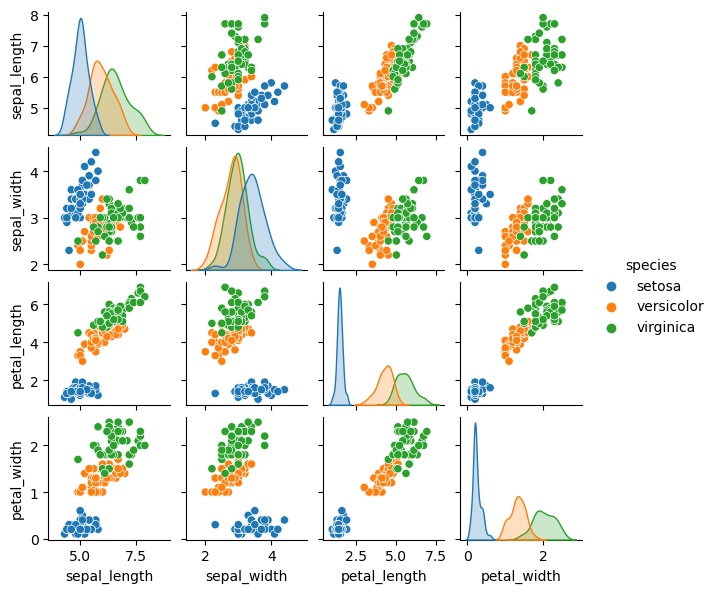

In [2]:
sns.pairplot(iris, hue='species', height=1.5);

In [4]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

We're not going to be making any real predictions, so a train-test split is not needed in this example.

### Exercise

Now let's use the famous $k$-means approach to clustering. Find out (with Google) how to import `KMeans`, then instantiate and fit. Note that our `X` is a DataFrame, and this is fine: we can pass it to `fit` without problems.

### Exercise: Score

Next we'll evaluate the method. Use the `score` method as usual.

We get a number, in fact a negative number. 

### Exercise

What does that mean? Look it up using `help(km.score)`.

### Using the model

In unsupervised learning, what is the output? We can now look at the labels for the training data. Note that these are just integer labels and the ordering (0, 1, 2) is arbitrary. Although there are three species in the data, we have not used the species labels in training. Our hope is only that we'll find approximately the same three clusters in our unsupervised learning.

In [10]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

(If you didn't know that the labels were stored in `km.labels_`, you could look it up using `dir(km)`.)

But this gives us another way to evaluate performance: we can compare the true labels with the labels from clustering as follows.

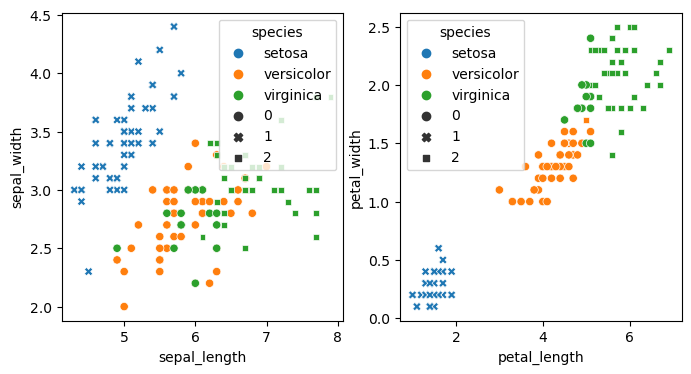

In [10]:
fig, axs = plt.subplots(1, 2)
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", 
                hue="species", style=km.labels_, ax=axs[0])
sns.scatterplot(data=iris, x="petal_length", y="petal_width", 
                hue="species", style=km.labels_, ax=axs[1])
plt.gcf().set_size_inches(8, 4)

As we can see, there is a strong correspondence between the cluster labels and the `y` species labels. This is an artificial evaluation, because when training we pretended we didn't have any `y`. We wouldn't be able to do this with a real unsupervised dataset. But it confirms that the clustering is along the expected lines.

Another thing we can do is find out, for a new point, which cluster it would fall into. Here is a new point, put into a DataFrame for convenience. Remember, Scikit-Learn is happy to accept a DataFrame here, because we trained on a DataFrame.

In [16]:
Xnew = pd.DataFrame({"sepal_length": [2], "sepal_width": [2], 
                     "petal_length": [2], "petal_width": [2]})

### Exercise

What cluster would `Xnew` be in?

Of course, the result must be interpreted with respect to the integer labels we found above.

**Example**: the same API we just used for KMeans works for Gaussian Mixture, another model which can be used
both for density estimation (and hence anomaly detection) and also clustering. The following is from PDSH
but is updated, as PDSH is out of date here: it mentions `GMM` which is now known as `GaussianMixture`.

In [17]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,
            covariance_type='full')
model.fit(X_iris)
y = model.predict(X_iris)

### Exercise

Try out multiple values of $k$ and plot `score()` against $k$. Where do you think is the "knee" or the "sweet spot" trading off model simplicity (small $k$) against performance (large `score`)?

Observe that the constructor `KMeans` returns a `KMeans` object and the `fit` method returns the same object (after fitting), so we can chain these calls and the `score` call on one line.